In [0]:
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Read in Images

In [0]:
#get list of file names for pneumonia images from training set
file_names_pneumonia = listdir('/content/gdrive/My Drive/Capstone Project 2/chest_xray/train/PNEUMONIA')

#initilize list of images
pneumonia_image_list = []
pneumonia_file_path = []
pneumonia_list = []

for i in file_names_pneumonia:
    #concat filepath with file name
    temp_path = '/content/gdrive/My Drive/Capstone Project 2/chest_xray/train/PNEUMONIA/' + i
    #append images from filepath
    pneumonia_image_list.append(plt.imread(temp_path))
    #append filepath
    pneumonia_file_path.append(temp_path)
    #label the image as pneumonia
    pneumonia_list.append('pneumonia')

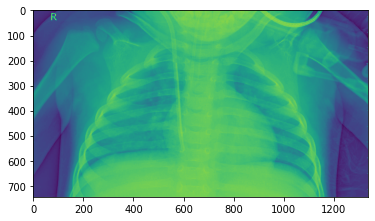

In [0]:
#show image
plt.imshow(pneumonia_image_list[0])

In [0]:
#get list of file names for normal images from training set
file_names_normal = listdir('/content/gdrive/My Drive/Capstone Project 2/chest_xray/train/NORMAL')

#initialize lists
normal_image_list = []
normal_file_path = []
normal_list = []

for i in file_names_normal:
    #create filepath for every image filename
    temp_path = '/content/gdrive/My Drive/Capstone Project 2/chest_xray/train/NORMAL/' + i
    
    #append images to image list
    normal_image_list.append(plt.imread(temp_path))

    #append filepath
    normal_file_path.append(temp_path)

    normal_list.append('normal')

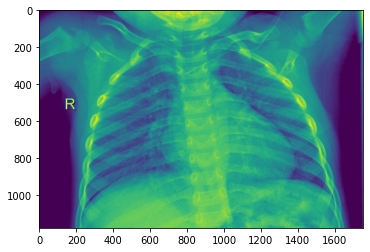

In [0]:
#show normal image
plt.imshow(normal_image_list[0])

In [0]:
#combine the normal and pneumonia lists
image_list = pneumonia_image_list + normal_image_list
file_path_list = pneumonia_file_path + normal_file_path
condition_list = pneumonia_list + normal_list

#create a dataframe from the lists
df = pd.DataFrame({'image':image_list, 'file_path': file_path_list, 'condition':condition_list})

In [0]:
#define function for labeling normal and pneumonia images as 0 and 1 respectively
def labels(condition):
  if condition == 'normal':
    result = 0
  elif condition == 'pneumonia':
    result = 1
  return result

#create label column using labels function
df['label'] = df['condition'].apply(labels)

In [0]:
df.head()

,image,file_path,condition,label
0,"[[40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, ...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1
1,"[[7, 7, 8, 9, 9, 10, 11, 11, 11, 11, 11, 12, 1...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1
2,"[[13, 13, 13, 12, 12, 11, 11, 11, 16, 14, 12, ...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1
3,"[[166, 162, 161, 163, 164, 162, 164, 168, 165,...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1


In [0]:
#save the dataframe as a csv
df_train = df[['file_path', 'condition', 'label']]
df_train.to_csv('/content/gdrive/My Drive/Capstone Project 2/train.csv', index = False)

In [0]:
#repeat process for test data
#get list of file names for pneumonia images from training set
file_names_pneumonia_test = listdir('/content/gdrive/My Drive/Capstone Project 2/chest_xray/test/PNEUMONIA')

#initilize list of images
pneumonia_image_list_test = []
pneumonia_file_path_test = []
pneumonia_list_test = []

for i in file_names_pneumonia_test:
    #concat filepath with file name
    temp_path = '/content/gdrive/My Drive/Capstone Project 2/chest_xray/test/PNEUMONIA/' + i
    #append filepath to image list
    pneumonia_image_list_test.append(plt.imread(temp_path))
    pneumonia_file_path_test.append(temp_path)
    #label the image as pneumonia
    pneumonia_list_test.append('pneumonia')

#get list of file names for normal images from training set
file_names_normal_test = listdir('/content/gdrive/My Drive/Capstone Project 2/chest_xray/test/NORMAL')

#initialize lists
normal_image_list_test = []
normal_file_path_test = []
normal_list_test = []

for i in file_names_normal_test:
    #create filepath for every image filename
    temp_path = '/content/gdrive/My Drive/Capstone Project 2/chest_xray/test/NORMAL/' + i
    
    #append filepath to image list
    normal_image_list_test.append(plt.imread(temp_path))
    normal_file_path_test.append(temp_path)
    normal_list_test.append('normal')

#combine the normal and pneumonia lists
image_list_test = pneumonia_image_list_test + normal_image_list_test
file_path_test = pneumonia_file_path_test + normal_file_path_test
condition_list_test = pneumonia_list_test + normal_list_test

#create a dataframe from the lists
df_test = pd.DataFrame({'file_path':file_path_test, 'condition':condition_list_test})
df_test['label'] = df_test['condition'].apply(labels)

In [0]:
df_test.to_csv('/content/gdrive/My Drive/Capstone Project 2/test.csv', index = False)

In [0]:
#get the number of rows in image
def get_x(image):
  return image.shape[0]

#get number of columns in image
def get_y(image):
  return image.shape[1]

In [0]:
#create columns for rows of an image
df['rows'] = df.image.apply(get_x)

#create columns for columns of an image
df['columns'] = df.image.apply(get_y)

#create columns for image aspect ratio
df['aspect_ratio'] = df['columns'] / df['rows']

In [0]:
df.head()

,image,file_path,condition,label,rows,columns,aspect_ratio
0,[[40 40 40 ... 36 36 36]\n [40 40 40 ... 36 36...,/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1,744,1336,1.795699
1,[[ 7 7 8 ... 0 0 0]\n [ 7 7 8 ...,/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1,776,1168,1.505155
2,[[13 13 13 ... 68 68 69]\n [13 13 12 ... 68 69...,/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1,664,984,1.481928
3,[[166 162 161 ... 158 160 164]\n [173 168 164 ...,/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1,979,1348,1.376915
4,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,/content/gdrive/My Drive/Capstone Project 2/ch...,pneumonia,1,872,1328,1.522936


# Explore Data

Plot the rows vs columns to get a better idea of the average aspect ratios across the images.

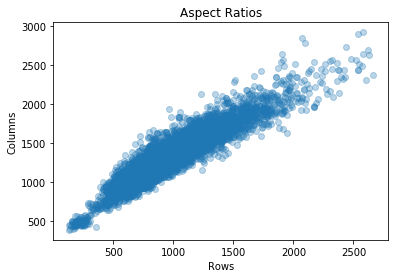

Mean Rows:  968.07
Mean Columns:  1320.61
Mean Aspect Ratio:  1.44


In [0]:
plt.scatter(df['rows'], df['columns'], alpha = 0.3)
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title('Aspect Ratios')
plt.show()
print('Mean Rows: ', round(np.mean(df['rows']),2))
print('Mean Columns: ', round(np.mean(df['columns']),2))
print('Mean Aspect Ratio: ', round(np.mean(df.aspect_ratio),2))

Create a plot to compare the number of pneumonia and normal cases in our data set.  We can see that there is a slight imbalance, suggesting we may need to use metrics other that accuracy to evaluate our model.

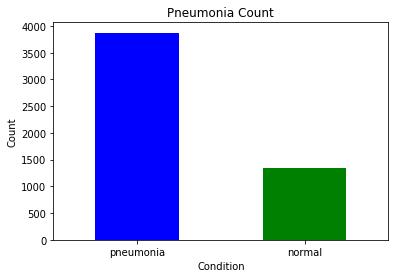

In [0]:
df.condition.value_counts().plot(kind = 'bar', color = ['b', 'g'])
plt.title('Pneumonia Count')
plt.xlabel('Condition')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.show()

# Using OpenCV for Image Processing

In [0]:
import cv2 as cv

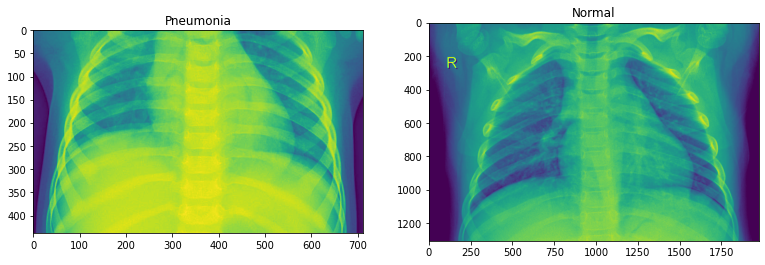

In [5]:
img1 = cv.imread('/content/gdrive/My Drive/Capstone Project 2/chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/gdrive/My Drive/Capstone Project 2/chest_xray/train/NORMAL/IM-0127-0001.jpeg', cv.IMREAD_GRAYSCALE)

plt.figure(figsize = (13,8))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title('Pneumonia')
plt.subplot(1,2,2)
plt.imshow(img2)
plt.title('Normal')
plt.show()

# Edge Detection

Let's see if we can find anything interesting using edge detection

In [0]:
def auto_canny(image, sigma = 0.5):
  #compute the median
  image_median = np.median(image)

  # apply automatic Canny edge detection using the computed median
  lower = int(max(0, (1.0 - sigma) * image_median))
  upper = int(min(255, (1.0 + sigma) * image_median))
  edged = cv.Canny(image, lower, upper)
  return edged

Text(0.5, 1.0, 'Normal')

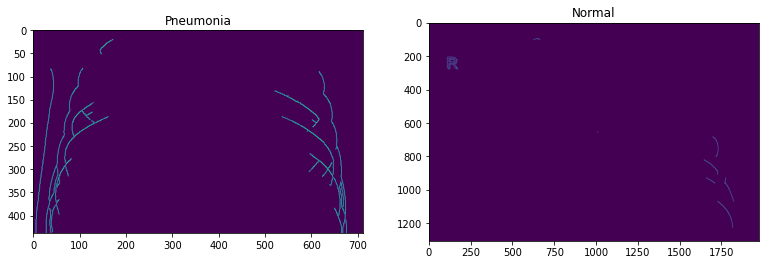

In [0]:
plt.figure(figsize = (13,8))
plt.subplot(1,2,1)
plt.imshow(auto_canny(img1))
plt.title('Pneumonia')
plt.subplot(1,2,2)
plt.imshow(auto_canny(img2))
plt.title('Normal')

It doesn't seem like anything obvious can be seen from detecting the edges.

# Feature Detection using FAST

In [0]:
def fast_detection(image):
  #use fast feature detector to detect features
  img_fast = image.copy()
  img_temp = img_fast * 0

  fast = cv.FastFeatureDetector_create()
  fast.setNonmaxSuppression(False)

  kp = fast.detect(img_fast, None)
  kp_img = cv.drawKeypoints(img_temp, kp, None, color=(0, 255, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  return kp_img

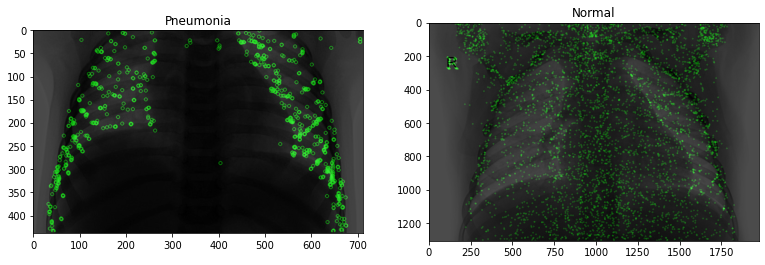

In [20]:
#plot the features detected using fast_detection
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
plt.imshow(fast_detection(img1))
plt.imshow(img1,alpha=0.3, cmap='Greys')
plt.title('Pneumonia')
plt.subplot(1,2,2)
plt.imshow(fast_detection(img2))
plt.imshow(img2,alpha=0.3, cmap='Greys')
plt.title('Normal')
plt.show()

From these 2 plots we can see that there is a clear recognizable pattern.  It would appear that near the center of the chest an area of darkness presents itself in cases with pneumonia, where as the normal x-rays have features more evenly scattered.

We can move along the x-axis of the chest x-ray image and take the average of all the pixel values.  This will essentially give us a cross sectional view of the mean pixel values across the image.  

By plotting this mean value across the image, we can see that towards the center there is a clear valley.  

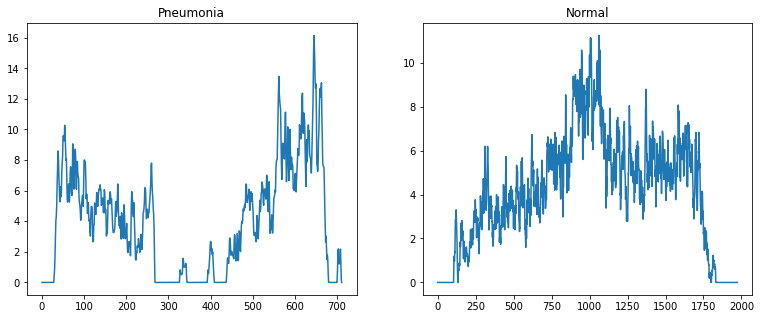

In [0]:
img1_fastplot = fast_detection(img1)
test_list1 = []
#move along the x-axis and take the average of all the pixels along the y-axis
for i in range(img1_fastplot.shape[1]):
  x = img1_fastplot[:,i,:].mean()
  test_list1.append(x)

#move along the x-axis and take the average of all the pixels along the y-axis
img2_fastplot = fast_detection(img2)
test_list2 = []
for i in range(img2_fastplot.shape[1]):
  x = img2_fastplot[:,i,:].mean()
  test_list2.append(x)

#plot the cross sectional averages
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
plt.title('Pneumonia')
plt.plot(test_list1)
plt.subplot(1,2,2)
plt.title('Normal')
plt.plot(test_list2)

Let's to check out another randomly selected pneumonia/normal image pair and see if a similar pattern exists.

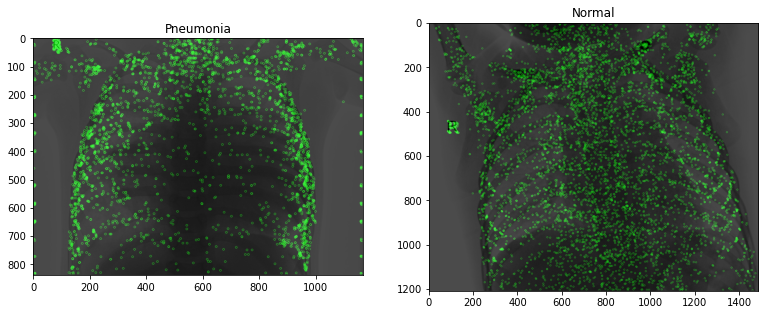

In [21]:
img3 = cv.imread('/content/gdrive/My Drive/Capstone Project 2/chest_xray/train/PNEUMONIA/person5_bacteria_16.jpeg', cv.IMREAD_GRAYSCALE)
img4 = cv.imread('/content/gdrive/My Drive/Capstone Project 2/chest_xray/train/NORMAL/IM-0156-0001.jpeg', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
plt.imshow(fast_detection(img3))
plt.imshow(img3, alpha=0.3, cmap='Greys')
plt.title('Pneumonia')
plt.subplot(1,2,2)
plt.imshow(fast_detection(img4))
plt.imshow(img4, alpha=0.3, cmap='Greys')
plt.title('Normal')
plt.show()

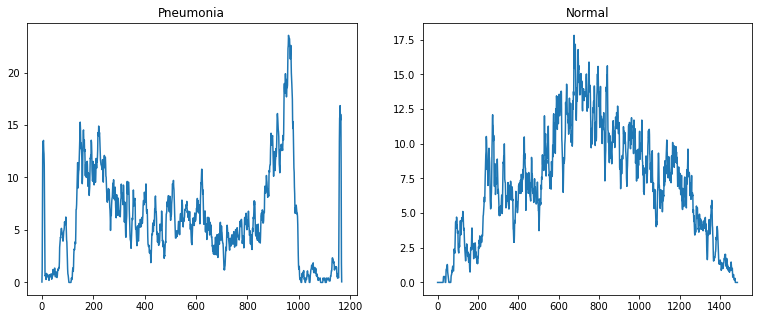

In [0]:
img3_fastplot = fast_detection(img3)
test_list3 = []
for i in range(img3_fastplot.shape[1]):
  x = img3_fastplot[:,i,:].mean()
  test_list3.append(x)

img4_fastplot = fast_detection(img4)
test_list4 = []
for i in range(img4_fastplot.shape[1]):
  x = img4_fastplot[:,i,:].mean()
  test_list4.append(x)

plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
plt.title('Pneumonia')
plt.plot(test_list3)
plt.subplot(1,2,2)
plt.title('Normal')
plt.plot(test_list4)

While not as obvious as the first sample we explored, it does appear that something similar is happening here as well.

Let's perform this process on all of the images in our training set, and take the average of the averages.  

To make this work we will need to resize the images so that they are all the same dimensions so that we can compare them.

In [0]:
#get the means for each x-ray image along the image's x-axis
def fast_detection_mean(file_path):
  img = cv.imread(file_path, cv.IMREAD_GRAYSCALE)
  resized = cv.resize(img, (300,200))

  image = fast_detection(resized)
  test_list = []
  for i in range(image.shape[1]):
    x = image[:,i,:].mean()
    test_list.append(x)

  return test_list

In [0]:
#apply the fast_detection_mean function to our dataframe of images
df['avg'] = df.file_path.apply(fast_detection_mean)

In [0]:
#create a list of averages for images with pneumonia, and normal
pneumonia_fastplot = list(df[df.label == 1].avg)
normal_fastplot = list(df[df.label == 0].avg)

In [0]:
#get the mean of the averages
pneumonia_fastplot_mean = np.mean(pneumonia_fastplot, axis = 0)
normal_fastplot_mean = np.mean(normal_fastplot, axis = 0)

<function matplotlib.pyplot.show>

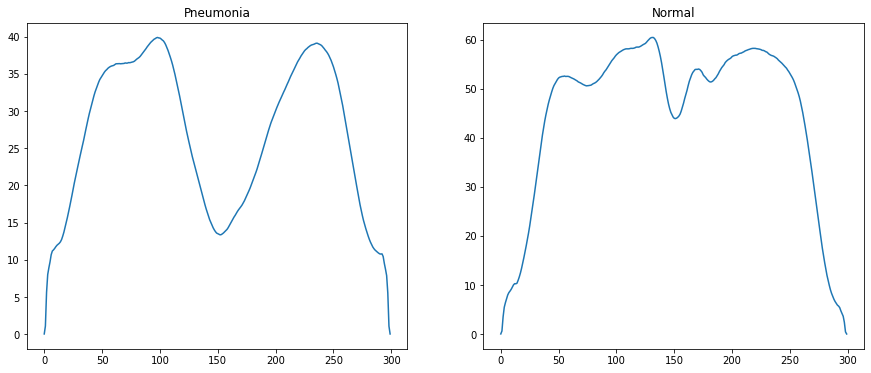

In [0]:
#plot the means
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(pneumonia_fastplot_mean)
plt.title('Pneumonia')
plt.subplot(1,2,2)
plt.plot(normal_fastplot_mean)
plt.title('Normal')
plt.show


Looking at these plots of the cross sectional means, we can see that a pattern does indeed present itself.  There tends to be a dip towards the middle of the image where the lungs would reside.

This might give some insight as to how pneumonia may be diagnosed.